# KMeans

In [ ]:
!pip install gdal
from sklearn.cluster import KMeans
from osgeo import gdal
import numpy as np

naip_fn = '/content/drive/MyDrive/Dataset/de/093_04JUN2011_S1_RADIANCE_01/IMS1_HYSI_GEO_093_04JUN2011_S1_RADIANCE_01_SPBIN.tif'
driverTiff = gdal.GetDriverByName('GTiff')
naip_ds = gdal.Open(naip_fn)
nbands = naip_ds.RasterCount
data = np.empty((naip_ds.RasterXSize*naip_ds.RasterYSize, nbands))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for i in range(1, nbands+1):
    band = naip_ds.GetRasterBand(i).ReadAsArray()
    data[:, i-1] = band.flatten()

In [ ]:
km = KMeans(n_clusters=7)
km.fit(data)
km.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
out_dat = km.labels_.reshape((naip_ds.RasterYSize, naip_ds.RasterXSize))

In [ ]:
clfds = driverTiff.Create('/content/drive/MyDrive/toup1/testing128.tif', naip_ds.RasterXSize, naip_ds.RasterYSize, 1, gdal.GDT_Float32)
clfds.SetGeoTransform(naip_ds.GetGeoTransform())
clfds.SetProjection(naip_ds.GetProjection())
clfds.GetRasterBand(1).SetNoDataValue(-9999.0)
clfds.GetRasterBand(1).WriteArray(out_dat)
clfds = None

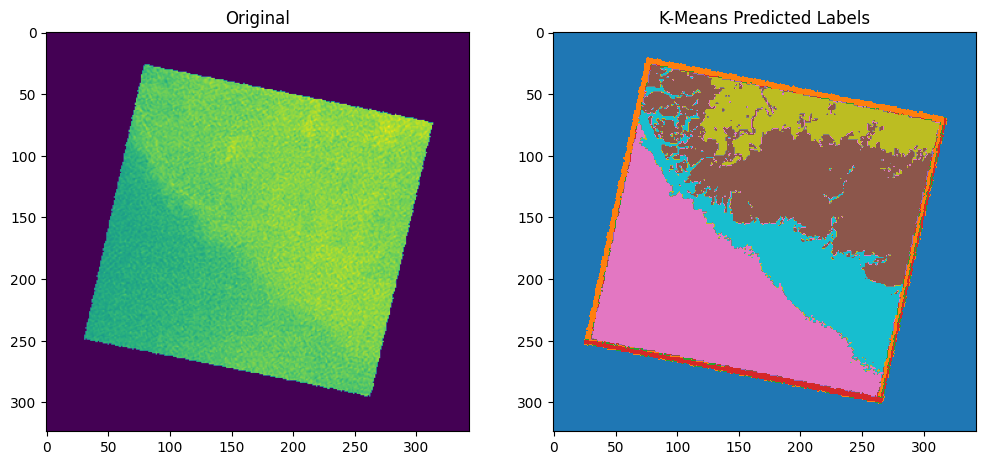

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset (replace '/path/to/your/dataset.tif' with your actual file path)
dataset_path = '/content/drive/MyDrive/Dataset/de/093_04JUN2011_S1_RADIANCE_01/IMS1_HYSI_GEO_093_04JUN2011_S1_RADIANCE_01_SPBIN.tif'
dataset = gdal.Open(dataset_path, gdal.GA_ReadOnly)

# Assuming 'kmeans_labels' contains the predicted labels from k-means clustering
# If 'kmeans_labels' is not defined, replace it with your actual predicted labels
#kmeans_labels = ...

# Visualize each band with the corresponding k-means predicted labels
# for i in range(1, dataset.RasterCount + 1):

band = dataset.GetRasterBand(1)
band_array = band.ReadAsArray()

    # Create a figure with subplots for the original band and the clustered labels
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original band
axes[0].imshow(band_array)  # Change 'gray' to the desired colormap
axes[0].set_title(f'Original')

    # Plot the k-means predicted labels
axes[1].imshow(out_dat, cmap='tab10')
axes[1].set_title(f'K-Means Predicted Labels')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


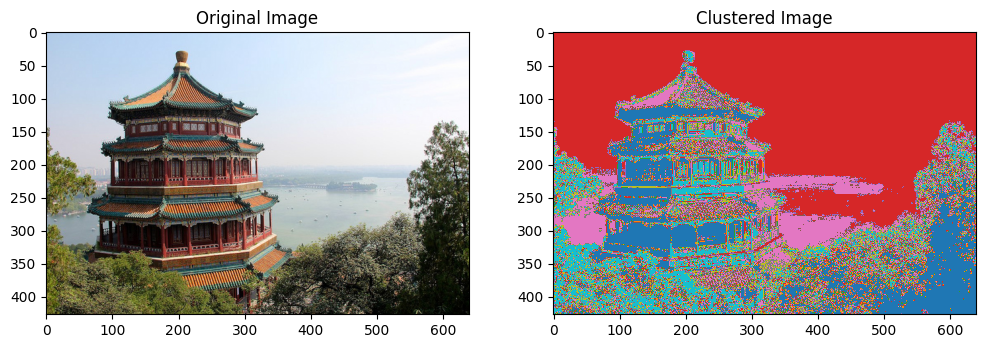

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image

# Load a sample image (you can replace this with your own image loading code)
china = load_sample_image("china.jpg")
data = china / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_flat)

# Get the predicted labels
predicted_labels = kmeans.predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='tab10')
plt.title('Clustered Image')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


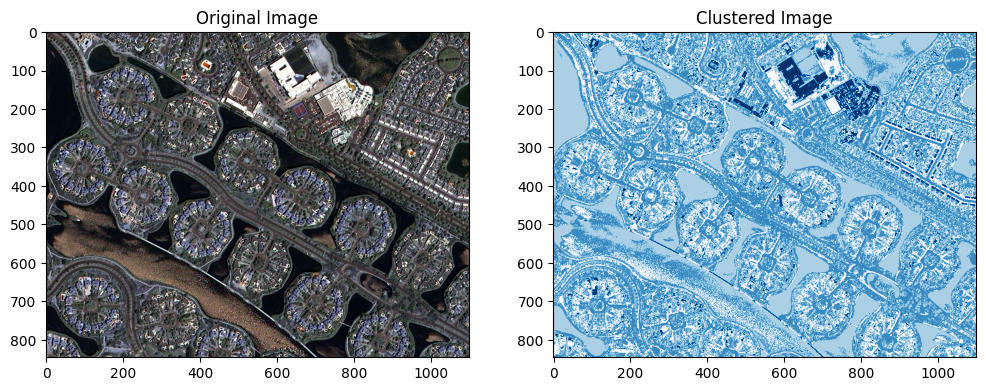

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/Semantic segmentation dataset/Tile 4/images/image_part_005.jpg'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_flat)

# Get the predicted labels
predicted_labels = kmeans.predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='Blues')
plt.title('Clustered Image')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


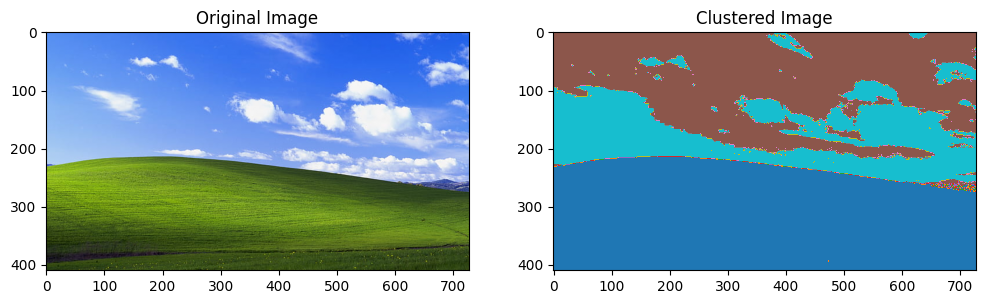

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/landscape-4k-bliss-windows-xp-wallpaper-preview.jpg'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_flat)

# Get the predicted labels
predicted_labels = kmeans.predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='tab10')
plt.title('Clustered Image')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


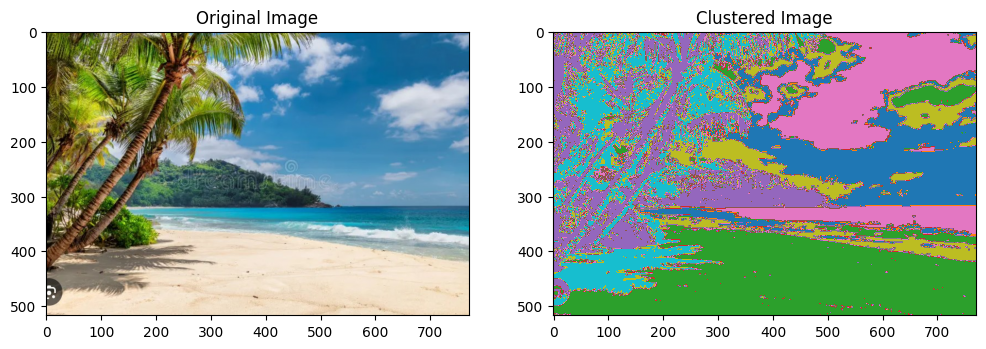

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/Screenshot 2023-11-19 183514.jpg'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_flat)

# Get the predicted labels
predicted_labels = kmeans.predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='tab10')
plt.title('Clustered Image')

plt.show()


# Applying DB scan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from skimage import io

# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/Semantic segmentation dataset/Tile 4/images/image_part_001.jpg'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Adjust eps and min_samples based on your data
predicted_labels = dbscan.fit_predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='tab10')
plt.title('Clustered Image (DBSCAN)')

plt.show()


# Gaussian Mixture

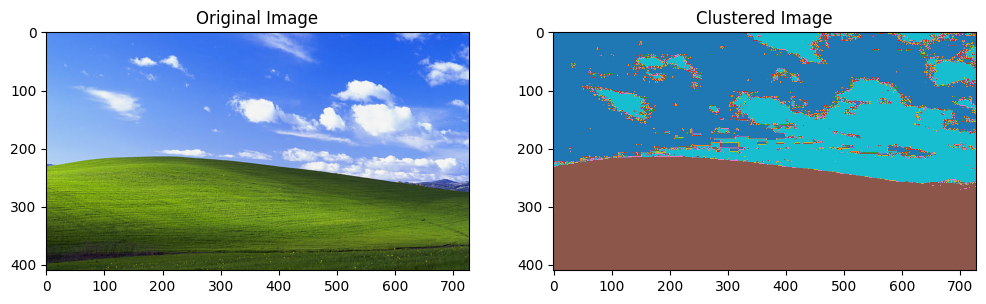

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import io

# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/landscape-4k-bliss-windows-xp-wallpaper-preview.jpg'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform Gaussian Mixture Model clustering
# Adjust n_components based on the number of clusters you want
gmm = GaussianMixture(n_components=3)
predicted_labels = gmm.fit_predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and GMM clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='tab10')
plt.title('Clustered Image')

plt.show()


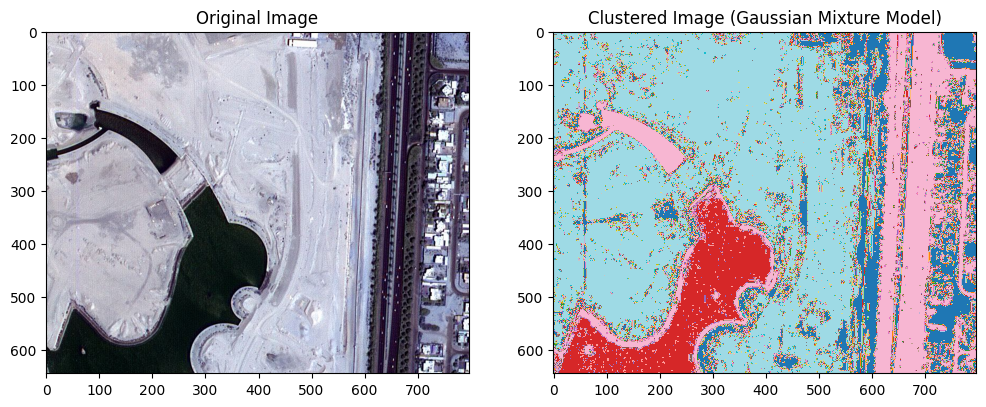

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import io

# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/Semantic segmentation dataset/Tile 1/images/image_part_003.jpg'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform Gaussian Mixture Model clustering
# Adjust n_components based on the number of clusters you want
gmm = GaussianMixture(n_components=4)
predicted_labels = gmm.fit_predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and GMM clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='Blues')
plt.title('Clustered Image (Gaussian Mixture Model)')

plt.show()


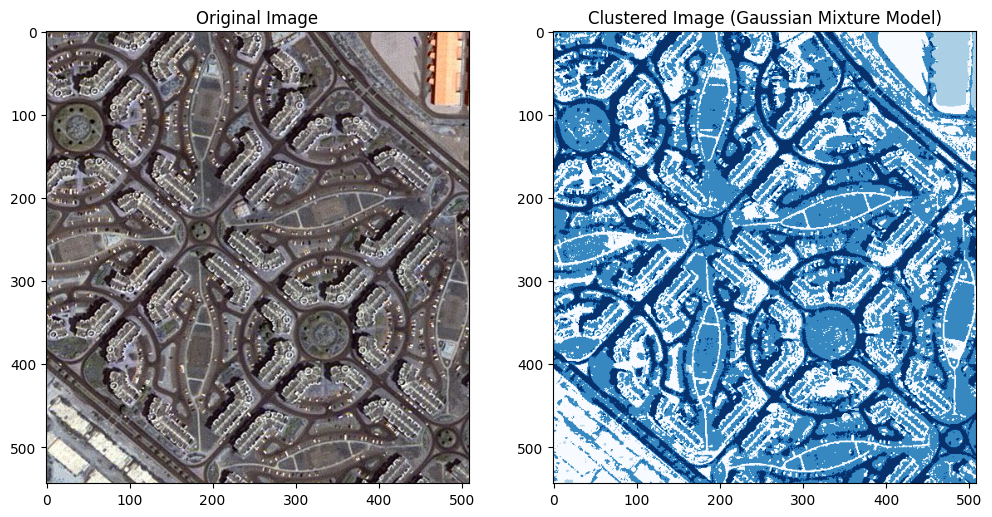

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import io

# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/Semantic segmentation dataset/Tile 2/images/image_part_001.jpg'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform Gaussian Mixture Model clustering
# Adjust n_components based on the number of clusters you want
gmm = GaussianMixture(n_components=4)
predicted_labels = gmm.fit_predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and GMM clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='Blues')
plt.title('Clustered Image (Gaussian Mixture Model)')

plt.show()


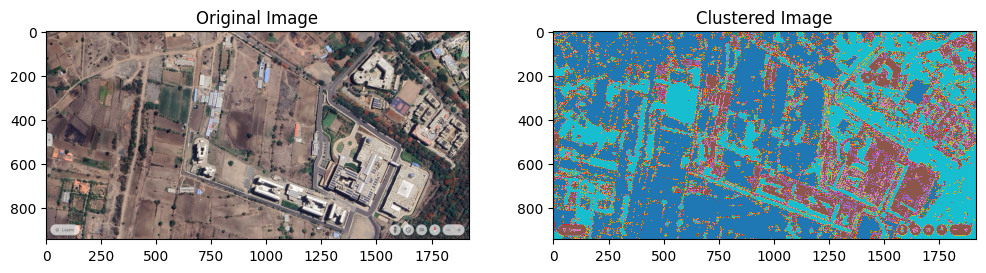

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import io

# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/sym.png'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform Gaussian Mixture Model clustering
# Adjust n_components based on the number of clusters you want
gmm = GaussianMixture(n_components=3)
predicted_labels = gmm.fit_predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and GMM clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='tab10')
plt.title('Clustered Image')

plt.show()


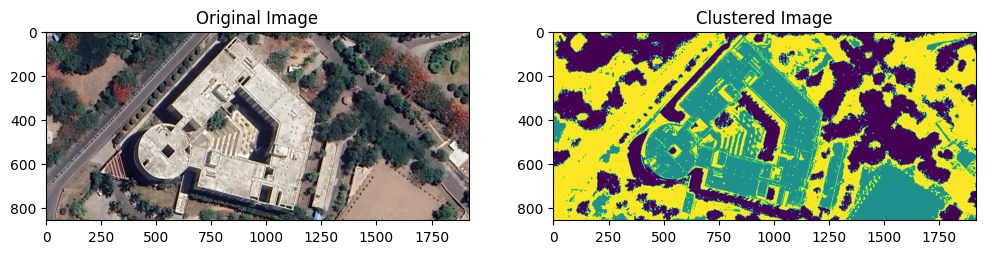

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import io

# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/Zoomed Cropped.png'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform Gaussian Mixture Model clustering
# Adjust n_components based on the number of clusters you want
gmm = GaussianMixture(n_components=3)
predicted_labels = gmm.fit_predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and GMM clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap='viridis')
plt.title('Clustered Image')

plt.show()

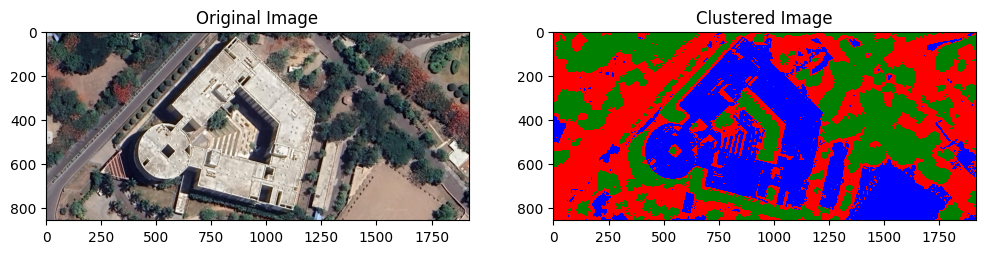

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import io
from matplotlib.colors import ListedColormap

# Define your custom colors
custom_colors = ['green', 'red', 'blue']

# Create a custom colormap
custom_cmap = ListedColormap(custom_colors)
# Specify the path to your custom image
image_path = '/content/drive/MyDrive/Dataset/Zoomed Cropped.png'

# Load the image
data = io.imread(image_path) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the data to a two-dimensional array
data_flat = data.reshape((-1, 3))

# Perform Gaussian Mixture Model clustering
# Adjust n_components based on the number of clusters you want
gmm = GaussianMixture(n_components=3)
predicted_labels = gmm.fit_predict(data_flat)

# Reshape the predicted labels to the original data shape
predicted_labels_2D = predicted_labels.reshape(data.shape[0], data.shape[1])

# Display the original and GMM clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_labels_2D, cmap=custom_cmap)
plt.title('Clustered Image')

plt.show()

#Working On multiSpectral data

In [ ]:
!pip install gdal
from sklearn.cluster import KMeans
from osgeo import gdal
import numpy as np

naip_fn = '/content/drive/MyDrive/Dataset/Compersses.tif'
driverTiff = gdal.GetDriverByName('GTiff')
naip_ds = gdal.Open(naip_fn)
nbands = naip_ds.RasterCount
data = np.empty((naip_ds.RasterXSize*naip_ds.RasterYSize, nbands))

In [ ]:
for i in range(1, nbands+1):
    band = naip_ds.GetRasterBand(i).ReadAsArray()
    data[:, i-1] = band.flatten()

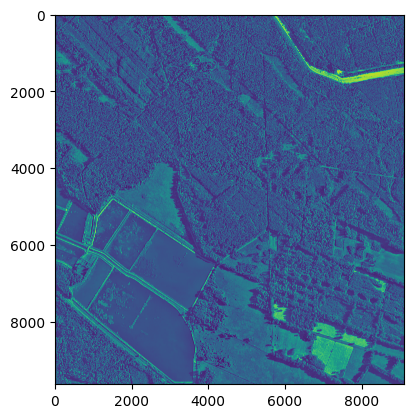

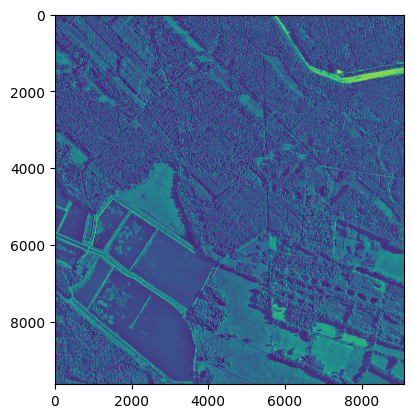

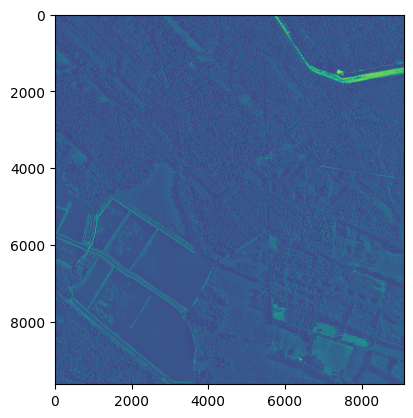

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open('/content/drive/MyDrive/Dataset/Compersses.tif', gdal.GA_ReadOnly)
# Note GetRasterBand() takes band no. starting from 1 not 0
for i in range(1,4):
  band = dataset.GetRasterBand(i)
  arr = band.ReadAsArray()
  plt.imshow(arr)
  plt.show()

In [ ]:
km = KMeans(n_clusters=4)
km.fit(data)
km.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
out_dat = km.labels_.reshape((naip_ds.RasterYSize, naip_ds.RasterXSize))

In [ ]:
clfds = driverTiff.Create('/content/drive/MyDrive/Dataset/Comperssesed 1 .tif', naip_ds.RasterXSize, naip_ds.RasterYSize, 1, gdal.GDT_Float32)
clfds.SetGeoTransform(naip_ds.GetGeoTransform())
clfds.SetProjection(naip_ds.GetProjection())
clfds.GetRasterBand(1).SetNoDataValue(-9999.0)
clfds.GetRasterBand(1).WriteArray(out_dat)
clfds = None

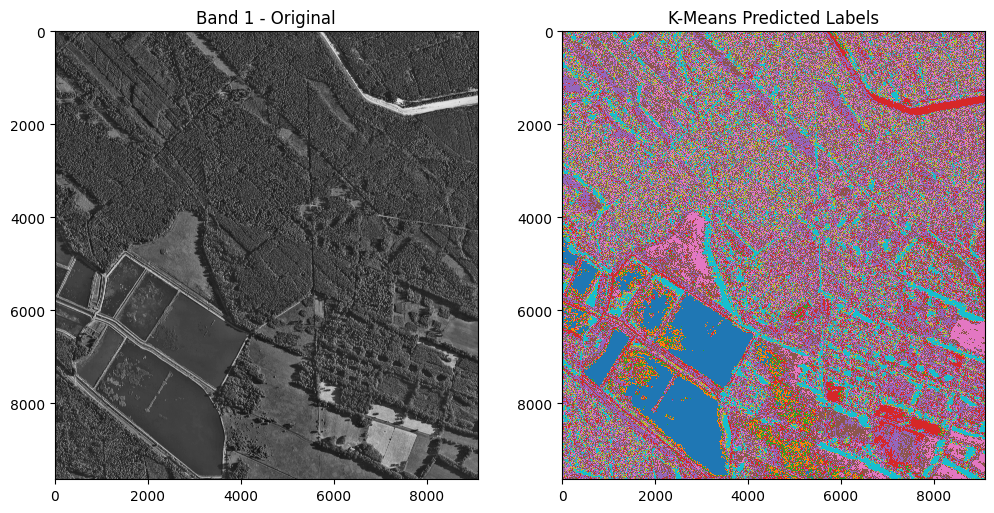

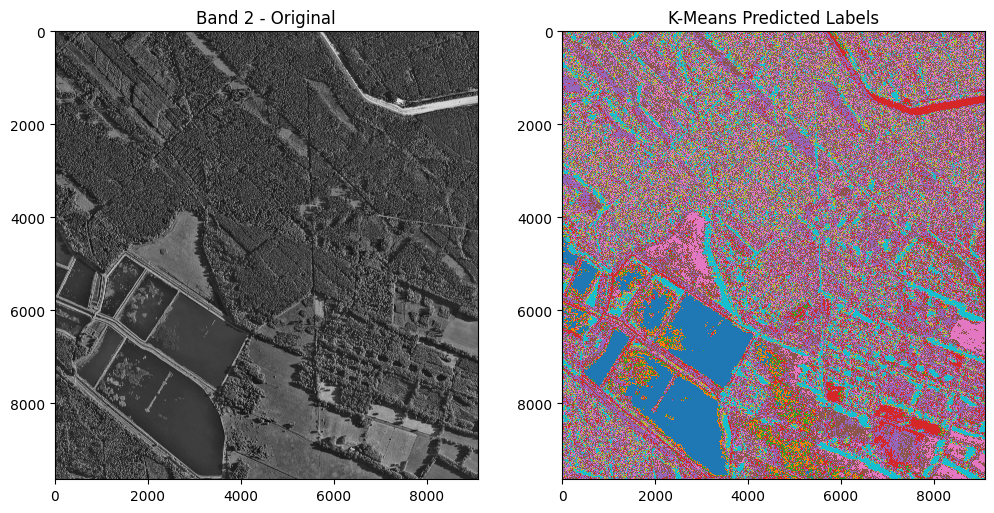

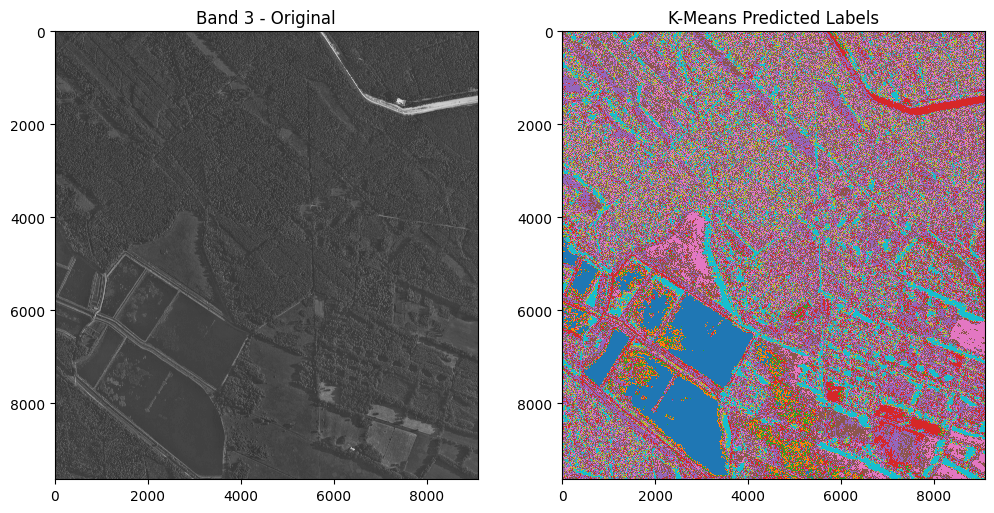

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset (replace '/path/to/your/dataset.tif' with your actual file path)
dataset_path = '/content/drive/MyDrive/Dataset/Compersses.tif'
dataset = gdal.Open(dataset_path, gdal.GA_ReadOnly)

# Assuming 'kmeans_labels' contains the predicted labels from k-means clustering
# If 'kmeans_labels' is not defined, replace it with your actual predicted labels
kmeans_labels = ...

# Visualize each band with the corresponding k-means predicted labels
for i in range(1, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(i)
    band_array = band.ReadAsArray()

    # Create a figure with subplots for the original band and the clustered labels
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original band
    axes[0].imshow(band_array)  # Change 'gray' to the desired colormap
    axes[0].set_title(f'Band {i} - Original')

    # Plot the k-means predicted labels
    axes[1].imshow(out_dat, cmap='tab10')
    axes[1].set_title(f'K-Means Predicted Labels')

    plt.show()
